# Análise de Sentimento - Reviews Mercado Livre (Dataset 2)

## Objetivo
Este notebook tem como objetivo realizar uma análise exploratória e de sentimento sobre o dataset `reviews_mercadolivre_com_br_2.json`.
Vamos investigar a distribuição das notas, padrões textuais e extrair insights sobre a satisfação dos clientes.

## Dataset
O dataset contém reviews de produtos extraídos do site Mercado Livre, com informações de data, nota (rating), texto do comentário e URL do produto.
O arquivo analisado é o `reviews_mercadolivre_com_br_2.json`.

### Configuração e Importação de Bibliotecas

In [ ]:
# Instalação de bibliotecas necessárias
# !pip install pandas numpy matplotlib seaborn nltk wordcloud

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configuração de Estilo Visual
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# NLP
import nltk
from wordcloud import WordCloud

# Baixando recursos do NLTK necessários para processamento de texto
recursos_nltk = ['punkt', 'stopwords']
for recurso in recursos_nltk:
    try:
        nltk.data.find(f'tokenizers/{recurso}')
    except LookupError:
        nltk.download(recurso, quiet=True)
        print(f"Recurso '{recurso}' baixado.")

Recurso 'punkt' baixado.
Recurso 'stopwords' baixado.


### Carregamento e Inspeção Inicial dos Dados

In [3]:
# Carregando o dataset
try:
    df = pd.read_json('../datasets/reviews_mercadolivre_com_br_2.json')
    print("Dataset carregado com sucesso!")
    display(df.head())
except Exception as e:
    print(f"Erro ao carregar o dataset: {e}")

Dataset carregado com sucesso!


,date,rating,content,product_url
0,01 fev. 2025,5,Muito bom gostei.,https://produto.mercadolivre.com.br/MLB-357687...
1,22 jan. 2025,5,"Perfeito. Eu simplesmente amei , ele e maravil...",https://produto.mercadolivre.com.br/MLB-357687...
2,12 jan. 2025,5,Muito cheiroso e a consistência e maravilhosa.,https://produto.mercadolivre.com.br/MLB-357687...
3,29 nov. 2024,4,,https://produto.mercadolivre.com.br/MLB-404730...
4,12 fev. 2025,5,Produto maravilhoso.,https://produto.mercadolivre.com.br/MLB-404730...


In [ ]:
# Informações básicas sobre o dataset
print(f"Dimensões do dataset: {df.shape}")
df.info()

Dimensões do dataset: (103476, 4)

Informações das colunas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103476 entries, 0 to 103475
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   date         103476 non-null  object
 1   rating       103476 non-null  int64 
 2   content      103476 non-null  object
 3   product_url  103476 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.2+ MB


In [5]:
# Verificando valores nulos
print("\nValores nulos por coluna:")
print(df.isnull().sum())


Valores nulos por coluna:
date           0
rating         0
content        0
product_url    0
dtype: int64


### Análise Exploratória de Dados (EDA)

/var/folders/6z/t3dlnmrj72jbmndmqk22nhp40000gn/T/ipykernel_50084/577839050.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')


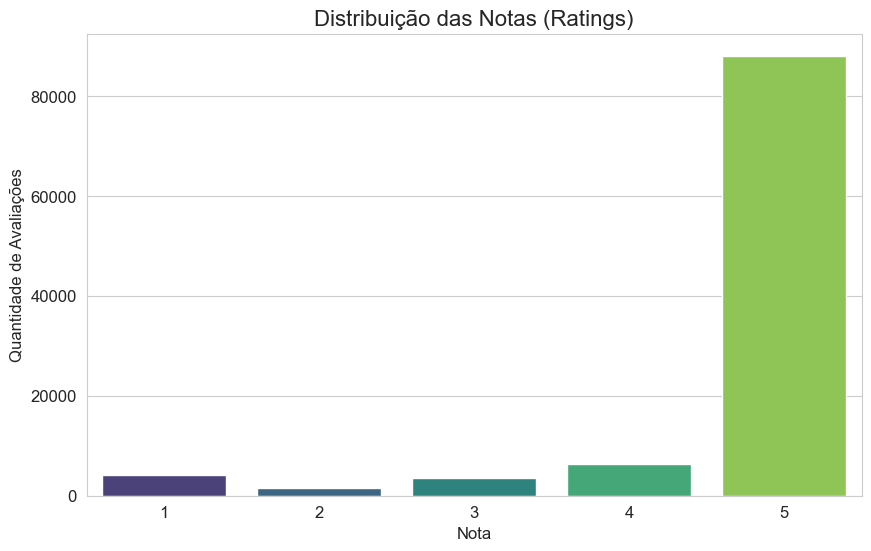

In [6]:
# Distribuição das avaliações (Ratings)
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Distribuição das Notas (Ratings)', fontsize=16)
plt.xlabel('Nota', fontsize=12)
plt.ylabel('Quantidade de Avaliações', fontsize=12)
plt.show()

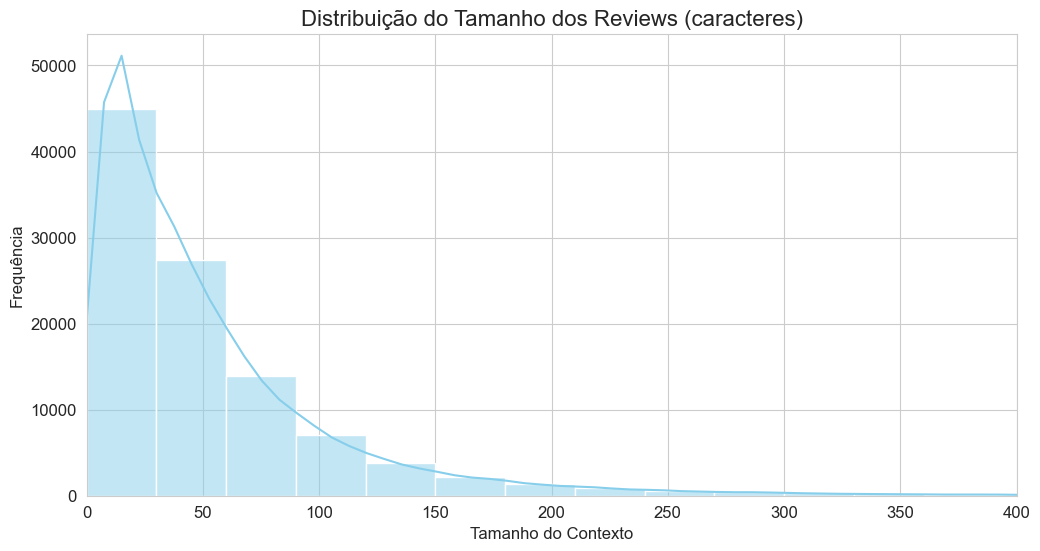

In [ ]:
# Análise do tamanho dos reviews
df['review_length'] = df['content'].astype(str).apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(df['review_length'], bins=50, kde=True, color='skyblue')
plt.title('Distribuição do Tamanho dos Reviews (caracteres)', fontsize=16)
plt.xlabel('Tamanho do Contexto', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xlim(0, 400) # Limitando o eixo X para melhor visualização
plt.show()

/var/folders/6z/t3dlnmrj72jbmndmqk22nhp40000gn/T/ipykernel_50084/765580103.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating', y='review_length', data=df, palette='coolwarm')


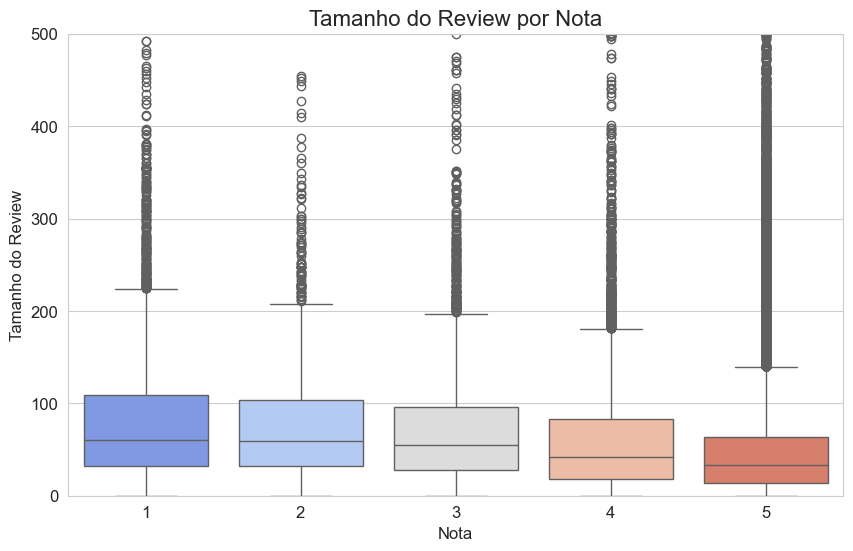

In [10]:
# Correlação entre Tamanho do Review e Nota
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='review_length', data=df, palette='coolwarm')
plt.title('Tamanho do Review por Nota', fontsize=16)
plt.ylim(0, 500) # Focando na maioria dos reviews
plt.xlabel('Nota', fontsize=12)
plt.ylabel('Tamanho do Review', fontsize=12)
plt.show()

### Análise Textual (Word Clouds)

Gerando WordClouds...


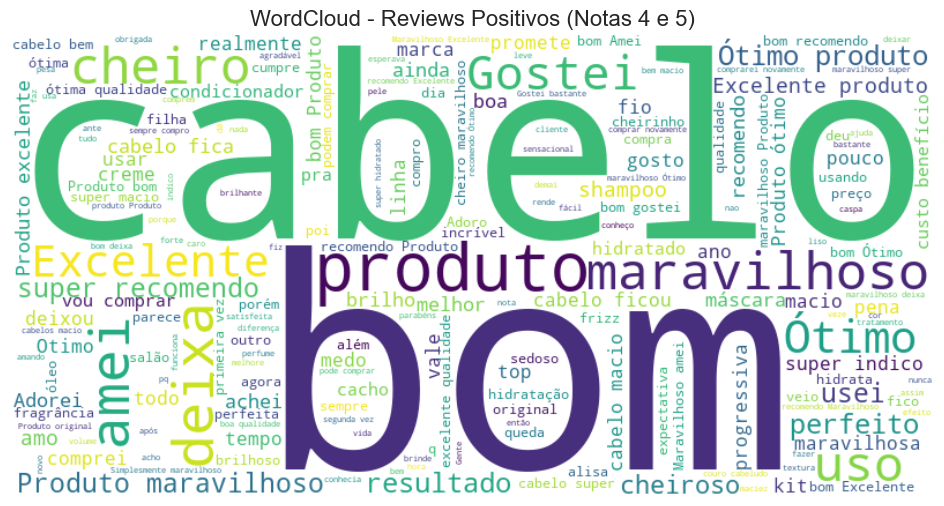

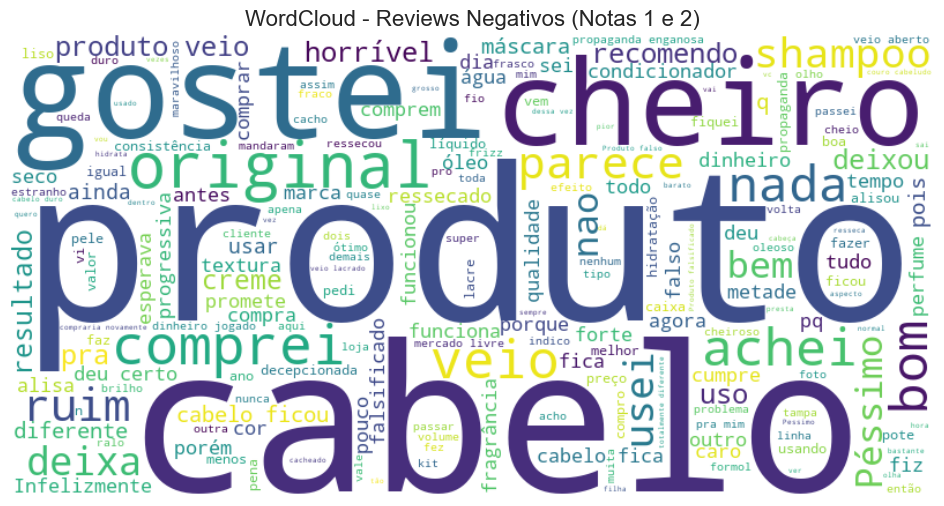

In [11]:
def gerar_wordcloud(texto, titulo):
    try:
        stopwords = nltk.corpus.stopwords.words('portuguese')
        # Adicionando stopwords customizadas se necessário
        # stopwords.extend(['produto', 'comprei', 'muito'])
        
        wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(texto)
        
        plt.figure(figsize=(12, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(titulo, fontsize=16)
        plt.show()
    except ValueError:
        print(f"Não foi possível gerar WordCloud para: {titulo} (possivelmente dados insuficientes)")

# Separando reviews positivos e negativos
reviews_positivos = ' '.join(df[df['rating'] >= 4]['content'].dropna().astype(str))
reviews_negativos = ' '.join(df[df['rating'] <= 2]['content'].dropna().astype(str))

print("Gerando WordClouds...")
gerar_wordcloud(reviews_positivos, 'WordCloud - Reviews Positivos (Notas 4 e 5)')
gerar_wordcloud(reviews_negativos, 'WordCloud - Reviews Negativos (Notas 1 e 2)')